<a href="https://colab.research.google.com/github/marcellels/dsrepo/blob/master/LSTM_Teste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importar as bibliotecas necessárias
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

%tensorflow_version 2.x

In [2]:
# importar o arquivo .csv para um DataFrame
dataset_path = 'https://raw.githubusercontent.com/marcellels/dsrepo/master/Database/Guaiba_2018_2019_met.csv'
df = pd.read_csv(dataset_path, delimiter=';', decimal=',', encoding='ISO-8859-1')

# ajustar a variável data para o tipo correspondente
df.DATA = pd.to_datetime(df.DATA, format="%d-%m-%Y %H:%M")

In [3]:
# passar a coluna data para o index
df_copy = df.copy()
df_copy.index = df['DATA']

# ajustar o dataset
df_copy = df_copy.filter(['PM10']) # usar apenas a colona de PM10
df_copy = df_copy[12:] # retira as 12 horas referente aos dados do dia 2 (NaN)
dataset = df_copy.interpolate(method='linear') # interpola linearmente

**A partir daqui tem problema**

a normalização deveria ser feita após a divisão entre treino e teste. Faz o fit no x_train e depois transforma os demais de acordo

a divisão está correta?

In [4]:
train_lenght = math.ceil( len(dataset) * 0.8)
dataset = dataset.values

In [5]:
# padronizar os dados com StandardScaler por causa do Gradient Descent
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [6]:
# definir intervalo de treino
train = scaled_data[0:train_lenght , :]
print('Nº de dados para treino\t', len(train))

Nº de dados para treino	 13706


In [7]:
# dividir os dados entre x_train e y_train
x_train = []
y_train = []

for i in range(60, len(train)):
  x_train.append(train[i-60:i, 0])
  y_train.append(train[i, 0])

In [8]:
# converter o x_train e o y_train para um array
x_train, y_train = np.array(x_train), np.array(y_train)

In [9]:
# reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(13646, 60, 1)

In [10]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(x_train.shape[1], 1)))
#model.add(LSTM(50, return_sequences=False))
#model.add(Dense(25))
model.add(Dropout(0.3))
model.add(Dense(1))

In [11]:
# compilar o modelo
model.compile(loss='mean_squared_error', optimizer='adam')

In [12]:
# treinar o modelo
history = model.fit(x_train, y_train, epochs=50, batch_size=50, shuffle=False)

Epoch 1/50
273/273 [==============================] - 7s 26ms/step - loss: 5.1473e-04
Epoch 2/50
273/273 [==============================] - 7s 26ms/step - loss: 3.7213e-04
Epoch 3/50
273/273 [==============================] - 7s 27ms/step - loss: 3.1290e-04
Epoch 4/50
273/273 [==============================] - 7s 27ms/step - loss: 2.9240e-04
Epoch 5/50
273/273 [==============================] - 7s 27ms/step - loss: 2.9013e-04
Epoch 6/50
273/273 [==============================] - 7s 27ms/step - loss: 2.8035e-04
Epoch 7/50
273/273 [==============================] - 7s 26ms/step - loss: 2.7366e-04
Epoch 8/50
273/273 [==============================] - 7s 27ms/step - loss: 2.6920e-04
Epoch 9/50
273/273 [==============================] - 7s 26ms/step - loss: 2.6777e-04
Epoch 10/50
273/273 [==============================] - 7s 27ms/step - loss: 2.7076e-04
Epoch 11/50
273/273 [==============================] - 7s 26ms/step - loss: 2.6869e-04
Epoch 12/50
273/273 [==============================]

In [13]:
# definir intervalo de teste
test = dataset[train_lenght - 60: , :]
print('Nº de dados para treino\t', len(test))

Nº de dados para treino	 3486


In [14]:
# criar o dataset x_test e y_test
x_test = []
y_test = dataset[train_lenght: , :]

for i in range(60, len(test)):
  x_test.append(test[i-60:i, 0])

In [15]:
# converter o x_test para um array
x_test = np.array(x_test)

In [16]:
# reshape the data para 3 dimension
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [17]:
# get the models prediction
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [18]:
# calculate RMSE
rmse = np.sqrt( np. mean( predictions - y_test )** 2 )
rmse

25.283233387106982

_________________________________________________________________

Não considerar daqui adiante, apenas rascunho

In [ ]:
plt.plot(history.history['loss'], 'b', label='training history')
plt.plot(history.history['val_loss'],  'r',label='testing history')
plt.legend()
plt.show()

KeyError: ignored

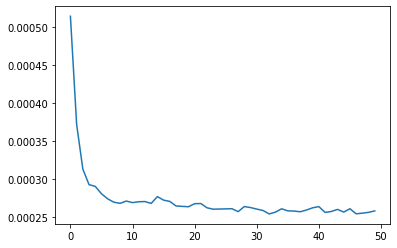

In [23]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
# Plot the data
treino = dataset[:train_lenght] 
valid = dataset[train_lenght:]
valid['Predictions'] = predictions

#visualizar os dados
plt. figure(figsize=(16, 8))
plt.plot(treino['PM10'])
plt.plot(valid['PM10', 'Predictions'])

In [ ]:
# dividir entre treino, validação e teste
X_train_original, X_test, y_train_original, y_test = train_test_split(dataset.data, dataset.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_original, y_train_original)

In [ ]:
# padronizar os dados com StandardScaler por causa do Gradient Descent
scaler = MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_valid = scaler.transform(X_valid)

In [ ]:
tscv = TimeSeriesSplit(n_splits=5)
print(tscv)

for train_index, test_index in tscv.split(X):
     print("TRAIN:", train_index, "TEST:", test_index)
     X_train, X_test = X[train_index], X[test_index]
     y_train, y_test = y[train_index], y[test_index]
#TRAIN: [0] TEST: [1]
#TRAIN: [0 1] TEST: [2]
#TRAIN: [0 1 2] TEST: [3]
#TRAIN: [0 1 2 3] TEST: [4]
#TRAIN: [0 1 2 3 4] TEST: [5]

In [ ]:
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

In [ ]:
# converter o dataframe para um array
valores = df_interp.values

In [ ]:
# scale the data >>> aqui o cara normalizou todo o dataset, precisa ser apenas o treino primeiro?
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(valores)

In [ ]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1:], train_X.shape[2])))
model.add(Dense(1))

# compilar
model.compile(loss='mean_squared_error', optimizer='adam')

# obter o histórico de loss
history = model.fit(X_train, y_train, epochs=50, batch_size=72, validation_data=(X_valid, y_valid), verbose=2, shuffle=False)

# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)